In [1114]:
import pandas as pd

In [1115]:
matches=pd.read_csv("./dim_match_summary.csv")
matches.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [1116]:
matches. tail()


,team1,team2,winner,margin,matchDate,match_id
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853
205,Super Kings,Titans,Titans,5 wickets,"Mar 31, 2023",T201566


In [1117]:
matches.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205    False
Length: 206, dtype: bool

In [1118]:
matches.drop_duplicates(inplace=True)

In [1119]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [1120]:
# most successful team
top_teams = matches['winner'].value_counts().head()
top_teams

winner
Super Kings    25
RCB            25
Titans         23
Royals         22
KKR            21
Name: count, dtype: int64

In [1121]:
close_matches = matches[(matches['margin'].str.contains("runs")) & (matches['margin'].str.extract('(\d+)').astype(int) < 10).any(axis=1)]
close_matches

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\surya\AppData\Local\Temp\ipykernel_52220\583068645.py:1: SyntaxWarning: invalid escape sequence '\d'
  close_matches = matches[(matches['margin'].str.contains("runs")) & (matches['margin'].str.extract('(\d+)').astype(int) < 10).any(axis=1)]


,team1,team2,winner,margin,matchDate,match_id
8,Sunrisers,RCB,Sunrisers,4 runs,"Oct 6, 2021",T209992
12,RCB,Punjab Kings,RCB,6 runs,"Oct 3, 2021",T207754
23,Punjab Kings,Sunrisers,Punjab Kings,5 runs,"Sep 25, 2021",T203188
28,Royals,Punjab Kings,Royals,2 runs,"Sep 21, 2021",T207857
53,RCB,Sunrisers,RCB,6 runs,"Apr 14, 2021",T202204
55,Punjab Kings,Royals,Punjab Kings,4 runs,"Apr 12, 2021",T207896
67,Super Giants,KKR,Super Giants,2 runs,"May 18, 2022",T202863
68,Sunrisers,Mumbai,Sunrisers,3 runs,"May 17, 2022",T206060
82,Mumbai,Titans,Mumbai,5 runs,"May 6, 2022",T201720
88,Super Giants,Capitals,Super Giants,6 runs,"May 1, 2022",T208561


In [1122]:
batting = pd.read_csv("./fact_bating_summary.csv")
players = pd.read_csv("./dim_players.csv")

In [1123]:
batting.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [1124]:
players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [1125]:
# Top run scores
top_scorers = (batting.groupby('batsmanName')["runs"].sum()
              .reset_index()
              .sort_values(by='runs', ascending=False))
top_scorers
             


,batsmanName,runs
222,ShubmanGill,1851
66,FafduPlessis,1831
197,RuturajGaikwad,1593
97,KLRahul,1516
95,JosButtler,1509
...,...,...
210,ShahbazNadeem,0
203,SanjayYadav,0
233,TNatarajan,0
259,YashDayal,0


In [1126]:
merged=top_scorers.merge(players, left_on='batsmanName', right_on='name')

In [1127]:
merged

,batsmanName,runs,name,team,battingStyle,bowlingStyle,playingRole
0,ShubmanGill,1851,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter
1,FafduPlessis,1831,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RuturajGaikwad,1593,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
3,KLRahul,1516,KLRahul,Punjab Kings,Right hand Bat,Not Available,Wicketkeeper Batter
4,JosButtler,1509,JosButtler,Royals,Right hand Bat,Not Available,Wicketkeeper Batter
...,...,...,...,...,...,...,...
259,ShahbazNadeem,0,ShahbazNadeem,Sunrisers,Right hand Bat,Slow Left arm Orthodox,Bowler
260,SanjayYadav,0,SanjayYadav,Mumbai,Left hand Bat,Slow Left arm Orthodox,Allrounder
261,TNatarajan,0,TNatarajan,Sunrisers,Left hand Bat,Left arm Medium,Bowler
262,YashDayal,0,YashDayal,Titans,Right hand Bat,Left arm Medium fast,Bowler


In [1128]:
bowling= pd.read_csv("./fact_bowling_summary.csv")

In [1129]:
bowling

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.00,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.00,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.00,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.50,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.50,6,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,T201566,Super Kings Vs Titans,Super Kings,DeepakChahar,4.0,0,29,0,7.25,9,1,2,0,0
2432,T201566,Super Kings Vs Titans,Super Kings,TusharDeshpande,3.2,0,51,1,15.30,5,4,4,1,1
2433,T201566,Super Kings Vs Titans,Super Kings,RajvardhanHangargekar,4.0,0,36,3,9.00,10,4,1,3,1
2434,T201566,Super Kings Vs Titans,Super Kings,MitchellSantner,4.0,0,32,0,8.00,7,5,0,0,0


In [1130]:
# top wicket takers

top_wickets = (bowling.groupby('bowlerName')["wickets"].sum()
                .reset_index()
                .sort_values(by='wickets'))

top_wickets


,bowlerName,wickets
11,AmanHakimKhan,0
24,BenStokes,0
62,JalajSaxena,0
56,HimanshuSharma,0
51,HarbhajanSingh,0
...,...,...
20,AveshKhan,47
141,RashidKhan,63
54,HarshalPatel,65
201,YuzvendraChahal,66


In [1131]:
#Best economy (with condition)

economy = (bowling.groupby('bowlerName')
            .agg({'overs': "sum", 'runs': 'sum'})
            .query('overs > 50')
            .assign(economy=lambda x: x['runs'] / x['overs'])
            .sort_values(by='economy')
            .reset_index()
            .head(10)
            )

economy

,bowlerName,overs,runs,economy
0,SunilNarine,160.0,1056,6.600000
1,MoeenAli,70.7,501,7.086280
2,AxarPatel,132.0,939,7.113636
3,RashidKhan,182.5,1317,7.216438
4,JaspritBumrah,108.2,793,7.329020
5,KrunalPandya,113.1,843,7.453581
6,RavindraJadeja,136.0,1014,7.455882
7,RavichandranAshwin,156.0,1175,7.532051
8,VarunChakravarthy,159.4,1209,7.584693
9,HarpreetBrar,66.1,503,7.609682


In [1132]:
top_winners = matches['winner'].value_counts().head(10)
top_winners

winner
Super Kings     25
RCB             25
Titans          23
Royals          22
KKR             21
Capitals        21
Mumbai          20
Punjab Kings    19
Super Giants    17
Sunrisers       13
Name: count, dtype: int64

In [1133]:
#Export results -> CSV to excel

top_scorers.to_csv("ipl_top_scorers.csv", index=False)
top_winners.to_csv("ipl_top_winners.csv", index=False)


In [1134]:
#1 Top 10 batsmen based on past 3 years total runs scored.
top_scorers = (batting.groupby('batsmanName')["runs"].sum()
                .reset_index()
                .sort_values(by='runs', ascending=False)
                .head(10))

top_scorers

,batsmanName,runs
222,ShubmanGill,1851
66,FafduPlessis,1831
197,RuturajGaikwad,1593
97,KLRahul,1516
95,JosButtler,1509
216,ShikharDhawan,1392
251,ViratKohli,1385
204,SanjuSamson,1304
230,SuryakumarYadav,1225
69,GlennMaxwell,1214


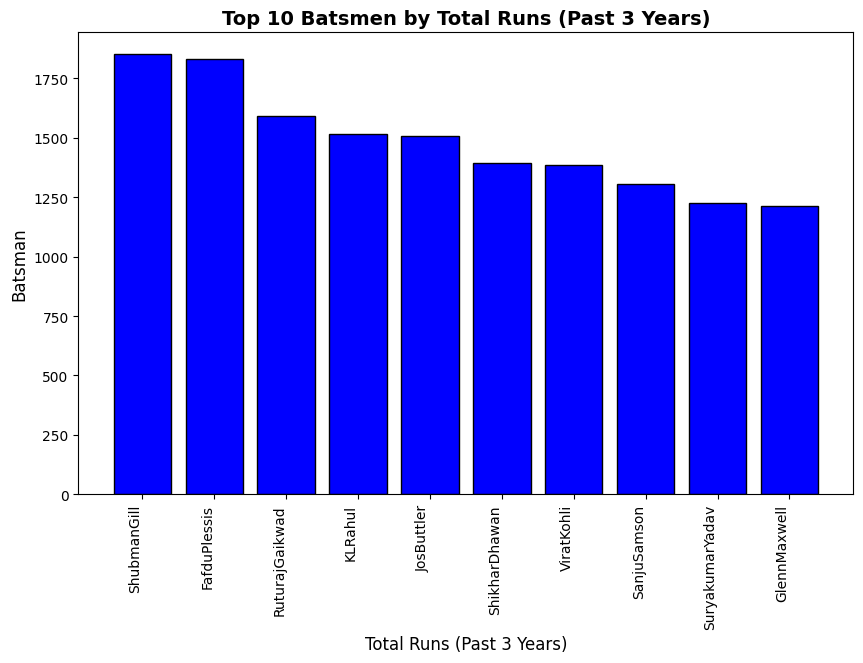

In [1135]:
top_scorers=top_scorers
plt.figure(figsize=(10,6))
plt.bar(top_scorers['batsmanName'], top_scorers['runs'], color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("Total Runs (Past 3 Years)", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.title("Top 10 Batsmen by Total Runs (Past 3 Years)", fontsize=14, fontweight='bold')
plt.show()

In [1136]:
#2  Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)
bat_agg = (batting.groupby("batsmanName")
                   .agg(runs=("runs","sum"),
                       balls=("balls","sum"),
                   ))
finishers = (bat_agg.query("balls >= 180")
                    .assign(batting_average=lambda x: x["runs"] / x["balls"].replace(0, pd.NA))
                    .sort_values("batting_average", ascending=False)
                    .head(10))
print(finishers[["runs","balls","batting_average"]])

                 runs  balls  batting_average
batsmanName                                  
TimDavid          418    235         1.778723
HeinrichKlaasen   448    253         1.770751
LiamLivingstone   758    452         1.676991
GlennMaxwell     1214    752         1.614362
SuryakumarYadav  1225    763         1.605505
CameronGreen      452    282         1.602837
JiteshSharma      543    341         1.592375
AndreRussell      745    468         1.591880
ShimronHetmyer    854    543         1.572744
NicholasPooran    729    464         1.571121


                 runs  balls  batting_average
batsmanName                                  
TimDavid          418    235         1.778723
HeinrichKlaasen   448    253         1.770751
LiamLivingstone   758    452         1.676991
GlennMaxwell     1214    752         1.614362
SuryakumarYadav  1225    763         1.605505
CameronGreen      452    282         1.602837
JiteshSharma      543    341         1.592375
AndreRussell      745    468         1.591880
ShimronHetmyer    854    543         1.572744
NicholasPooran    729    464         1.571121


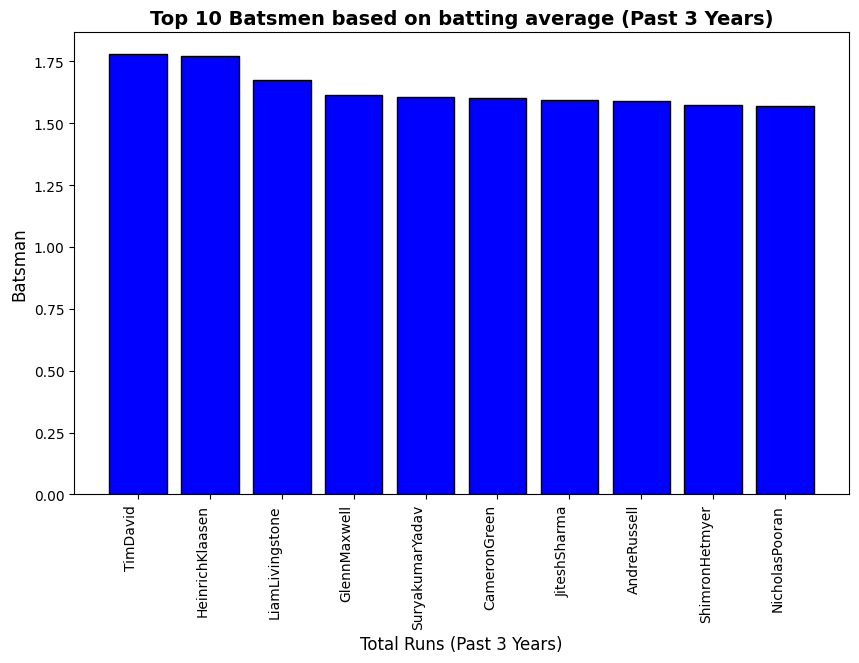

In [1137]:
print(finishers[["runs","balls","batting_average"]])
plt.figure(figsize=(10,6))
plt.bar(finishers.index, finishers['batting_average'], color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("Total Runs (Past 3 Years)", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.title("Top 10 Batsmen based on batting average (Past 3 Years)", fontsize=14, fontweight='bold')
plt.show()


In [1138]:
#3
bat_agg = (batting.groupby("batsmanName")
                  .agg(runs=("runs","sum"),
                       balls=("balls","sum"),
                      ))
finishers = (bat_agg.query("balls >= 100")
                    .assign(strike_rate=lambda x: 60 * x["runs"] / x["balls"])
                    .sort_values("strike_rate", ascending=False)
                    .head(15))
print(finishers[["runs","balls","strike_rate"]])


                 runs  balls  strike_rate
batsmanName                              
TimDavid          418    235   106.723404
HeinrichKlaasen   448    253   106.245059
RashidKhan        304    172   106.046512
LiamLivingstone   758    452   100.619469
PhilSalt          218    133    98.345865
GlennMaxwell     1214    752    96.861702
SuryakumarYadav  1225    763    96.330275
CameronGreen      452    282    96.170213
JiteshSharma      543    341    95.542522
AndreRussell      745    468    95.512821
ShimronHetmyer    854    543    94.364641
NicholasPooran    729    464    94.267241
PrithviShaw       815    532    91.917293
DineshKarthik     693    454    91.585903
YashasviJaiswal  1132    744    91.290323


                 runs  balls  strike_rate
batsmanName                              
TimDavid          418    235   106.723404
HeinrichKlaasen   448    253   106.245059
RashidKhan        304    172   106.046512
LiamLivingstone   758    452   100.619469
PhilSalt          218    133    98.345865
GlennMaxwell     1214    752    96.861702
SuryakumarYadav  1225    763    96.330275
CameronGreen      452    282    96.170213
JiteshSharma      543    341    95.542522
AndreRussell      745    468    95.512821
ShimronHetmyer    854    543    94.364641
NicholasPooran    729    464    94.267241
PrithviShaw       815    532    91.917293
DineshKarthik     693    454    91.585903
YashasviJaiswal  1132    744    91.290323


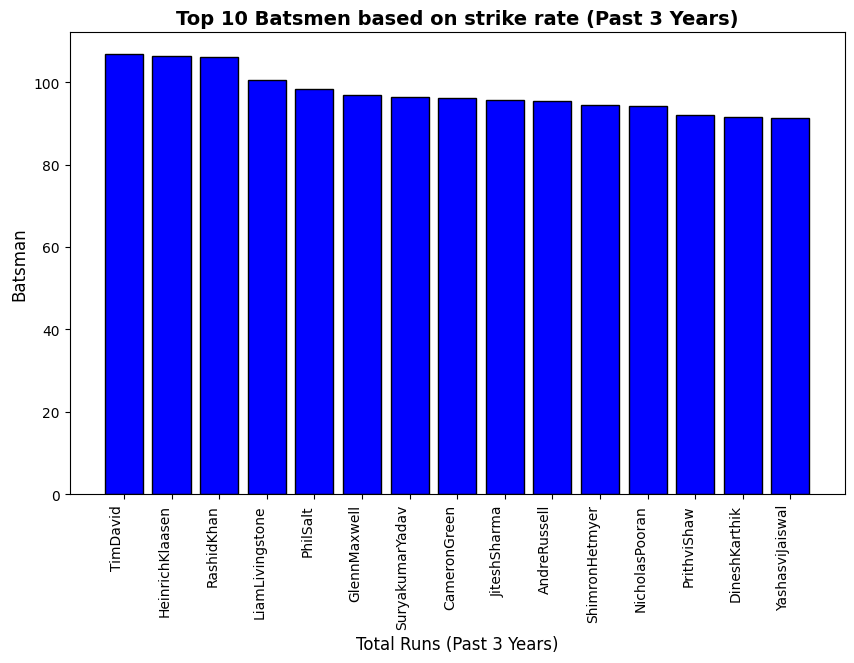

In [1139]:
print(finishers[["runs","balls","strike_rate"]])
plt.figure(figsize=(10,6))
plt.bar(finishers.index, finishers['strike_rate'], color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("Total Runs (Past 3 Years)", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.title("Top 10 Batsmen based on strike rate (Past 3 Years)", fontsize=14, fontweight='bold')
plt.show()

In [1140]:
#4Top 10 bowlers based on past 3 years total wickets taken
import pandas as pd
matches = pd.read_csv("./fact_bowling_summary.csv")
top10_bowler= (matches.groupby('bowlerName')['wickets'].sum()
               .reset_index()
               .sort_values(by='wickets',ascending=False)
               .head(10))

top10_bowler

,bowlerName,wickets
110,MohammedShami,67
201,YuzvendraChahal,66
54,HarshalPatel,65
141,RashidKhan,63
20,AveshKhan,47
19,ArshdeepSingh,45
75,KagisoRabada,45
189,VarunChakravarthy,44
163,ShardulThakur,43
181,TrentBoult,42


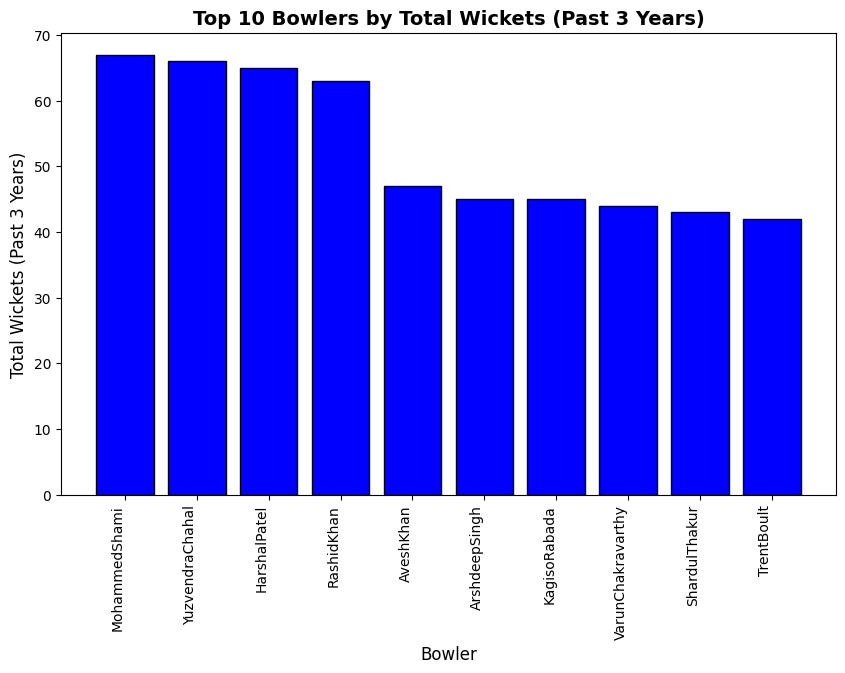

In [1141]:
import matplotlib.pyplot as plt

top10_bowler = top10_bowler
plt.figure(figsize=(10,6))
plt.bar(top10_bowler['bowlerName'], top10_bowler['wickets'], color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Total Wickets (Past 3 Years)", fontsize=12)
plt.title("Top 10 Bowlers by Total Wickets (Past 3 Years)", fontsize=14, fontweight='bold')
plt.show()

In [1142]:
#5Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)
import pandas as pd
matches = pd.read_csv("./fact_bowling_summary.csv")
bowl_agg = (bowling.groupby("bowlerName")
                  .agg(runs=("runs","sum"),
                       overs=("overs","sum"),
                       wickets=("wickets","sum"),
                      ))
finishers = (bowl_agg.query("overs >= 10")
                    .assign(bowler_average=lambda x:  x["runs"] / x["overs"])
                    .sort_values("bowler_average", ascending=False)
                    .head(10))
print(finishers[["runs","overs","wickets","bowler_average"]])

                  runs  overs  wickets  bowler_average
bowlerName                                            
ArshadKhan         190   13.7        5       13.868613
RiyanParag         132   10.1        2       13.069307
NavdeepSaini       198   16.0        6       12.375000
OdeanSmith         178   15.0        6       11.866667
ShreyasGopal       118   10.0        1       11.800000
AkashDeep          264   23.5        6       11.234043
TymalMills         190   17.0        6       11.176471
KartikTyagi        295   27.7        6       10.649819
JhyeRichardson     117   11.0        3       10.636364
VijaykumarVyshak   253   24.0        9       10.541667


                  runs  overs  wickets  bowler_average
bowlerName                                            
ArshadKhan         190   13.7        5       13.868613
RiyanParag         132   10.1        2       13.069307
NavdeepSaini       198   16.0        6       12.375000
OdeanSmith         178   15.0        6       11.866667
ShreyasGopal       118   10.0        1       11.800000
AkashDeep          264   23.5        6       11.234043
TymalMills         190   17.0        6       11.176471
KartikTyagi        295   27.7        6       10.649819
JhyeRichardson     117   11.0        3       10.636364
VijaykumarVyshak   253   24.0        9       10.541667


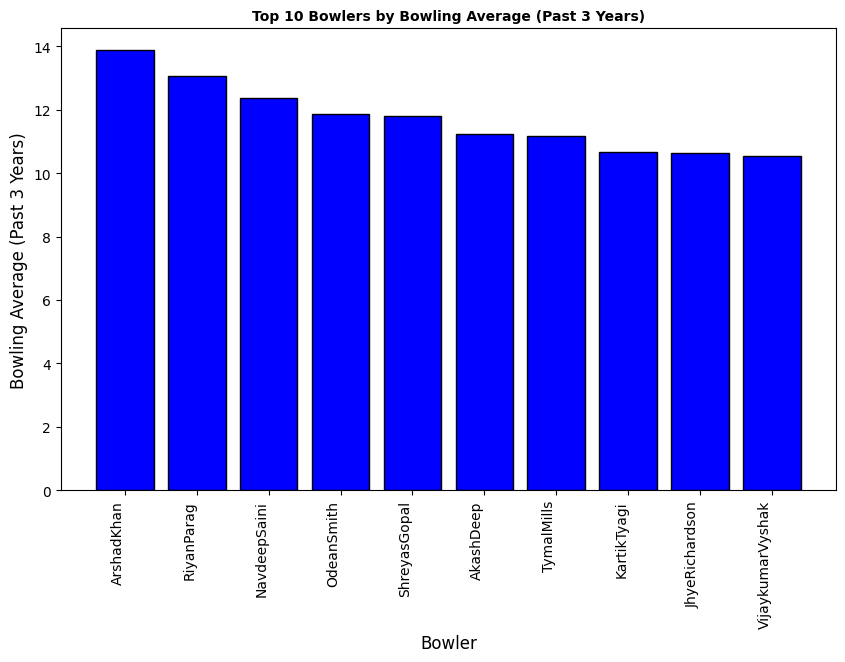

In [1143]:
print(finishers[["runs","overs","wickets","bowler_average"]])
plt.figure(figsize=(10,6))
plt.bar(finishers.index, finishers['bowler_average'], color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Bowling Average (Past 3 Years)", fontsize=12)
plt.title("Top 10 Bowlers by Bowling Average (Past 3 Years)", fontsize=10, fontweight='bold')
plt.show()

In [1144]:
#6 Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)
team_bowl = (bowling.groupby("bowlingTeam")
                     .agg(overs=("overs","sum"),
                          runs=("runs","sum"),
                          wickets=("wickets","sum"))
                     .assign(economy=lambda x: x["runs"]/x["overs"])
                     .sort_values("economy"))
print(team_bowl.head(10))


              overs  runs  wickets   economy
bowlingTeam                                 
Capitals      851.7  6999      253  8.217682
KKR           864.6  7130      253  8.246588
Titans        636.1  5307      208  8.343028
Super Giants  572.1  4794      181  8.379654
Super Kings   869.6  7290      272  8.383165
RCB           847.1  7222      270  8.525558
Punjab Kings  795.0  6800      222  8.553459
Royals        862.6  7426      237  8.608857
Mumbai        845.5  7295      245  8.628031
Sunrisers     795.6  6865      219  8.628708


              overs  runs  wickets   economy
bowlingTeam                                 
Capitals      851.7  6999      253  8.217682
KKR           864.6  7130      253  8.246588
Titans        636.1  5307      208  8.343028
Super Giants  572.1  4794      181  8.379654
Super Kings   869.6  7290      272  8.383165
RCB           847.1  7222      270  8.525558
Punjab Kings  795.0  6800      222  8.553459
Royals        862.6  7426      237  8.608857
Mumbai        845.5  7295      245  8.628031
Sunrisers     795.6  6865      219  8.628708


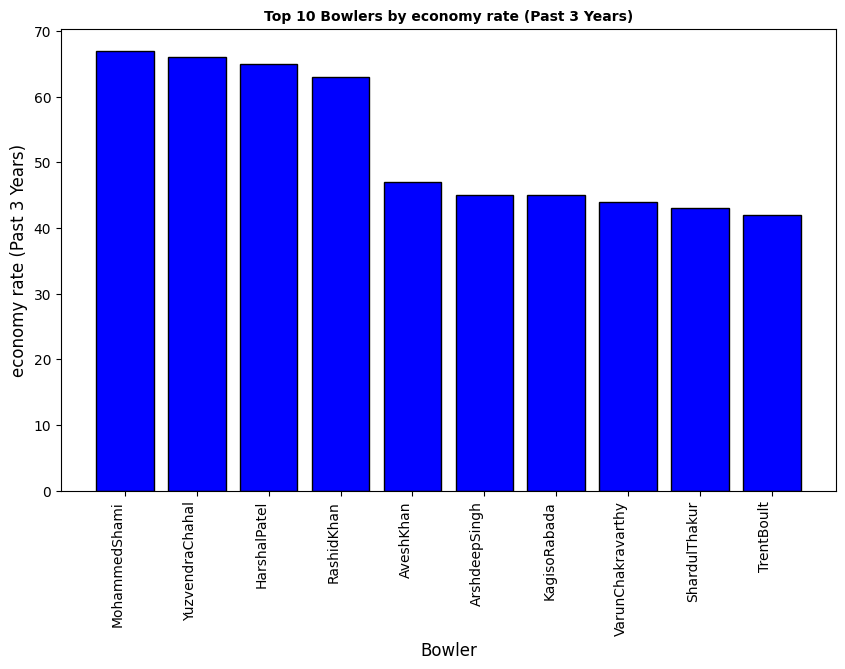

In [1145]:
print(team_bowl.head(10))
plt.figure(figsize=(10,6))
plt.bar(top10_bowler['bowlerName'], top10_bowler['wickets'], color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("economy rate (Past 3 Years)", fontsize=12)
plt.title("Top 10 Bowlers by economy rate (Past 3 Years)", fontsize=10, fontweight='bold')
plt.show()

In [1146]:
#7 Top 5 batsmen based on past 3 years boundary % (fours and sixes).

boundary =(
    batting.groupby("batsmanName")[["runs", "4s", "6s"]].sum()
           .assign(boundary_percent=lambda x:(x["4s"] + x["6s"]) / x["runs"]*100)
           .query("runs >=4")
           .sort_values("boundary_percent", ascending=False)
           .head(5)
)
print(boundary[["runs", "4s", "6s"]])


               runs  4s  6s
batsmanName                
AbhijeetTomar     4   1   0
LittonDas         4   1   0
ShreyasGopal     16   2   1
MarkWood         11   1   1
SanvirSingh      11   1   1


               runs  4s  6s
batsmanName                
AbhijeetTomar     4   1   0
LittonDas         4   1   0
ShreyasGopal     16   2   1
MarkWood         11   1   1
SanvirSingh      11   1   1


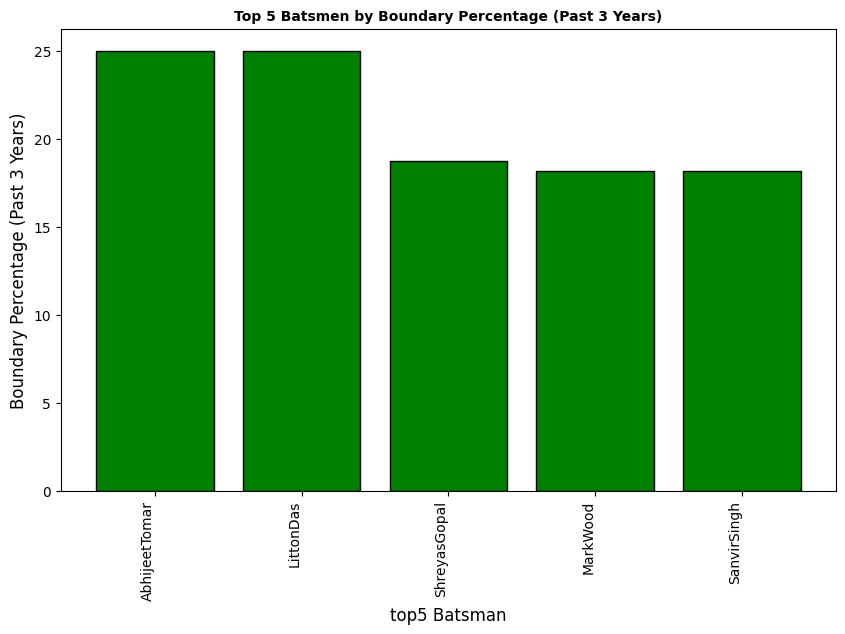

In [1147]:
print(boundary[["runs", "4s", "6s"]])
plt.figure(figsize=(10,6))
plt.bar(boundary.index, boundary['boundary_percent'], color='green', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("top5 Batsman", fontsize=12)
plt.ylabel("Boundary Percentage (Past 3 Years)", fontsize=12)
plt.title("Top 5 Batsmen by Boundary Percentage (Past 3 Years)", fontsize=10, fontweight='bold')
plt.show()

In [1148]:
#8 Top 5 bowlers based on past 3 years dot ball %.
bowling = bowling.copy()
bowling["balls"] = bowling["overs"] * 6
dot_ball_stats = (
    bowling.groupby("bowlerName")
           .agg(dot_balls=("0s", "sum"), balls=("balls", "sum"))
           .assign(dot_ball_percent=lambda x: 100 * x["dot_balls"] / x["balls"])
           .query("balls > 0")
           .sort_values("dot_ball_percent", ascending=False)
           .head(5)
)
print(dot_ball_stats[["dot_balls","balls","dot_ball_percent"]])

                dot_balls  balls  dot_ball_percent
bowlerName                                        
ShreyasIyer             4    6.0         66.666667
ImranTahir             14   24.0         58.333333
ReeceTopley             7   12.0         58.333333
DewaldBrevis            1    1.8         55.555556
SimarjeetSingh         57  108.0         52.777778


                dot_balls  balls  dot_ball_percent
bowlerName                                        
ShreyasIyer             4    6.0         66.666667
ImranTahir             14   24.0         58.333333
ReeceTopley             7   12.0         58.333333
DewaldBrevis            1    1.8         55.555556
SimarjeetSingh         57  108.0         52.777778


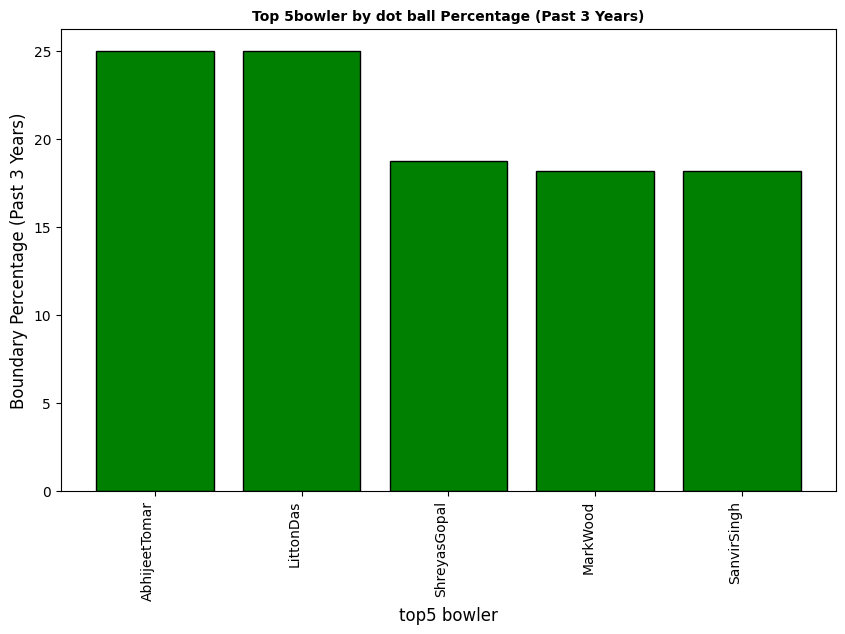

In [1154]:
print(dot_ball_stats[["dot_balls","balls","dot_ball_percent"]])
plt.figure(figsize=(10,6))
plt.bar(boundary.index, boundary['boundary_percent'], color='green', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.xlabel("top5 bowler", fontsize=12)
plt.ylabel("Boundary Percentage (Past 3 Years)", fontsize=12)
plt.title("Top 5bowler by dot ball Percentage (Past 3 Years)", fontsize=10, fontweight='bold')
plt.show()

In [1150]:
#9 Top 4 teams based on past 3 years winning %

# Use the correct match summary dataframe
match_summary = pd.read_csv("./dim_match_summary.csv")

played_t1 = match_summary["team1"].value_counts().sort_index()
played_t2 = match_summary["team2"].value_counts().sort_index()

tot_played = played_t1.add(played_t2, fill_value=0)

wins = match_summary["winner"].value_counts().sort_index()

top_teams = (wins / tot_played) * 100
top_teams = top_teams.dropna().sort_values(ascending=False)
top_teams.head(4)


winner
Titans          69.696970
Super Giants    58.620690
RCB             55.555556
Super Kings     55.555556
Name: count, dtype: float64

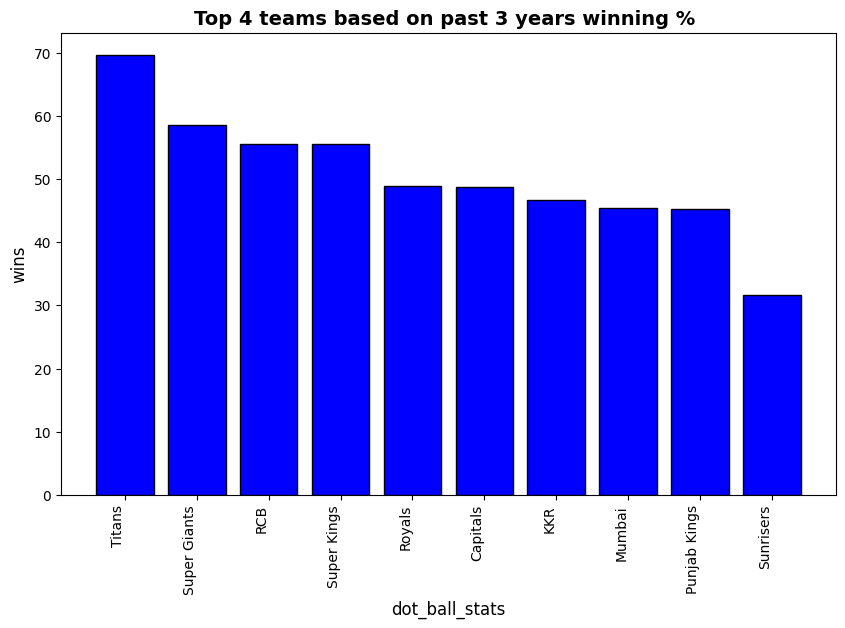

In [1151]:
top_teams.head(4)
plt.figure(figsize=(10,6))
plt.bar(top_teams.index, top_teams, color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xlabel("dot_ball_stats", fontsize=12)
plt.ylabel("wins", fontsize=12)
plt.title("Top 4 teams based on past 3 years winning % ", fontsize=14, fontweight='bold')
plt.show()

In [1152]:
#10 Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.
match_summary['year'] = pd.to_datetime(match_summary['matchDate'], errors='coerce').dt.year
chasing_wins = match_summary[match_summary['margin'].str.contains("wickets", case=False, na=False)]
chasing_counts = chasing_wins['winner'].value_counts()
top2_chasing = chasing_counts.head(2)
print(top2_chasing)


winner
KKR         14
Capitals    14
Name: count, dtype: int64


winner
KKR         14
Capitals    14
Name: count, dtype: int64


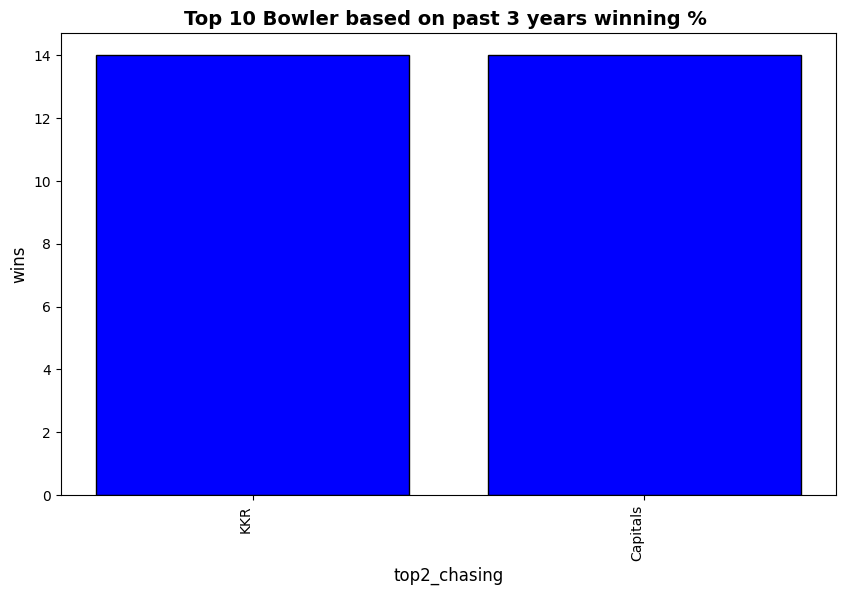

In [1153]:
print(top2_chasing)
plt.figure(figsize=(10,6))
plt.bar(top2_chasing.index, top2_chasing, color='blue', edgecolor='black')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xlabel("top2_chasing", fontsize=12)
plt.ylabel("wins", fontsize=12)
plt.title("Top 10 Bowler based on past 3 years winning % ", fontsize=14, fontweight='bold')
plt.show()